In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data(num_words=10000)

In [3]:
word_index = keras.datasets.reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(data):
    return ' '.join([reverse_word_index.get(idx - 3, '?') for idx in data])

print decode_review(train_data[1])

565248/550378 [==============================] - 1s 1us/step
? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3


In [5]:
def vectorize_sequences(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for idx, sequence in enumerate(sequences):
        results[idx, sequence] = 1.
    return results
def to_one_hot(labels, dim=46):
    #     results = np.zeros((len(labels), dim))
    #     for idx, label in enumerate(labels):
    #         results[idx, label] = 1.
    #     return results
    return keras.utils.to_categorical(labels)

X_train = vectorize_sequences(train_data)
y_train = to_one_hot(train_labels)
X_test = vectorize_sequences(test_data)
y_test = to_one_hot(test_labels)

In [8]:
X_val = X_train[:1000]
y_val = y_train[:1000]
partial_x_train = X_train[1000:]
partial_y_train = y_train[1000:]

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 63us/step - loss: 2.7162 - acc: 0.4871 - val_loss: 1.7847 - val_acc: 0.6340
Epoch 2/20
7982/7982 [==============================] - 0s 50us/step - loss: 1.4298 - acc: 0.7058 - val_loss: 1.3033 - val_acc: 0.7150
Epoch 3/20
7982/7982 [==============================] - 0s 49us/step - loss: 1.0277 - acc: 0.7823 - val_loss: 1.1076 - val_acc: 0.7600
Epoch 4/20
7982/7982 [==============================] - 0s 49us/step - loss: 0.7986 - acc: 0.8368 - val_loss: 1.0296 - val_acc: 0.7720
Epoch 5/20
7982/7982 [==============================] - 0s 48us/step - loss: 0.6320 - acc: 0.8691 - val_loss: 0.9507 - val_acc: 0.8110
Epoch 6/20
7982/7982 [==============================] - 0s 49us/step - loss: 0.5072 - acc: 0.8980 - val_loss: 0.9003 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 0s 49us/step - loss: 0.4088 - acc: 0.9162 - val_loss: 0.8875 - val_acc: 0.8120
Epoch 8

In [19]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc_values) + 1)

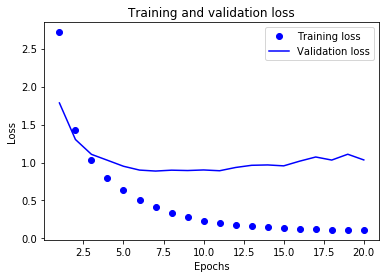

In [20]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

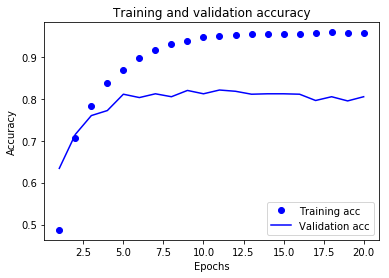

In [21]:
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [37]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(X_val, y_val))
results = model.evaluate(X_test, y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 88us/step - loss: 2.6266 - acc: 0.5124 - val_loss: 1.7431 - val_acc: 0.6260
Epoch 2/9
7982/7982 [==============================] - 0s 59us/step - loss: 1.4294 - acc: 0.6963 - val_loss: 1.3206 - val_acc: 0.7170
Epoch 3/9
7982/7982 [==============================] - 0s 57us/step - loss: 1.0562 - acc: 0.7709 - val_loss: 1.1570 - val_acc: 0.7450
Epoch 4/9
7982/7982 [==============================] - 0s 56us/step - loss: 0.8307 - acc: 0.8236 - val_loss: 1.0386 - val_acc: 0.7840
Epoch 5/9
7982/7982 [==============================] - 0s 57us/step - loss: 0.6580 - acc: 0.8628 - val_loss: 0.9685 - val_acc: 0.8030
Epoch 6/9
7982/7982 [==============================] - 0s 58us/step - loss: 0.5267 - acc: 0.8920 - val_loss: 0.9129 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 0s 59us/step - loss: 0.4181 - acc: 0.9186 - val_loss: 0.8980 - val_acc: 0.8130
Epoch 8/9
7982

In [41]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc_values) + 1)

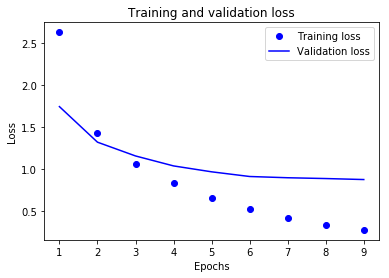

In [42]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

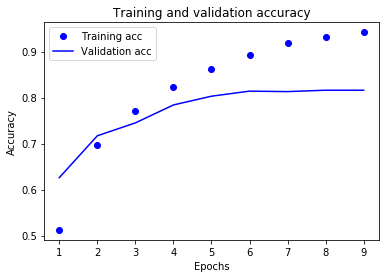

In [43]:
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [65]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print 'Guessing would get the accuracy of', float(np.sum(hits_array)) / len(test_labels)

2246 2246 423
Guessing would get the accuracy of 0.188334817453


In [77]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val))
results = model.evaluate(X_test, y_test)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.7402 - acc: 0.6397 - val_loss: 1.1953 - val_acc: 0.7300
Epoch 2/20
7982/7982 [==============================] - 0s 50us/step - loss: 0.9236 - acc: 0.7984 - val_loss: 0.9467 - val_acc: 0.7960
Epoch 3/20
7982/7982 [==============================] - 0s 50us/step - loss: 0.6020 - acc: 0.8695 - val_loss: 0.8838 - val_acc: 0.8200
Epoch 4/20
7982/7982 [==============================] - 0s 51us/step - loss: 0.4051 - acc: 0.9162 - val_loss: 0.8658 - val_acc: 0.8180
Epoch 5/20
7982/7982 [==============================] - 0s 53us/step - loss: 0.2931 - acc: 0.9360 - val_loss: 0.8803 - val_acc: 0.8250
Epoch 6/20
7982/7982 [==============================] - 0s 53us/step - loss: 0.2312 - acc: 0.9464 - val_loss: 0.8659 - val_acc: 0.8310
Epoch 7/20
7982/7982 [==============================] - 0s 55us/step - loss: 0.1903 - acc: 0.9523 - val_loss: 0.8851 - val_acc: 0.8160
Epoch 8

In [78]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc_values) + 1)
print results

[1.3909549925439824, 0.7822796082188801]


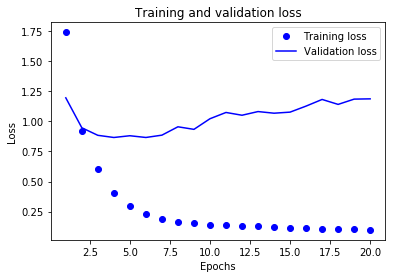

In [79]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

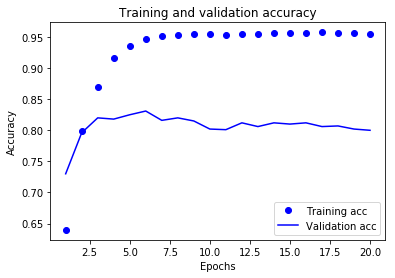

In [80]:
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()